# 1- Introdução: Previsão de câncer de pulmão com R

- O objetivo deste projeto é criar um modelo de machine learning utilizando o Tidymodels para prever o risco de câncer de pulmão. Este modelo pode ajudar as pessoas a entenderem melhor o risco de desenvolver câncer de pulmão com base em vários fatores, possibilitando a tomada de decisões apropriadas para a área saúde.
- Os dados foram coletados do Kaggle: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data
- Para este projeto, utilizamos o Tidymodels, cuja principal função é fornecer uma interface coerente para todas as etapas do processo de modelagem, desde a preparação dos dados até a validação do modelo e a geração de previsões. O Tidymodels pode ser comparado ao pipeline do scikit-learn em Python, permitindo a criação de fluxos de trabalho com transformações, ajuste de hiperparâmetros e validação cruzada utilizando workflows e recipes.

## 1.1 - Limitações
- Tamanho do Conjunto de Dados: O conjunto de dados utilizado é relativamente pequeno, contendo apenas 309 instâncias. Esse tamanho reduzido pode limitar a capacidade do modelo de generalizar para populações maiores e mais diversas.
- Desbalanceamento dos Dados: Os dados estavam extremamente desbalanceados, com 39 instâncias negativas para o desenvolvimento de câncer contra 270 instâncias positivas. Esse desbalanceamento pode levar a um viés no modelo, fazendo com que ele tenha dificuldade em identificar corretamente os casos negativos e, potencialmente, gerando um alto número de falsos positivos.
- Falta de Fonte dos Dados: Os dados no Kaggle não traziam a fonte da coleta, o que levanta preocupações sobre a validade e a representatividade dos dados. A ausência de informações sobre a origem dos dados pode afetar a confiabilidade do modelo treinado.

## 1.2 Pontos Positivos
- Identificação de Risco: Modelos de previsão podem identificar indivíduos com alto risco de desenvolver câncer de pulmão, permitindo intervenções preventivas e diagnósticos precoces, o que pode aumentar significativamente as chances de tratamento bem-sucedido.
- Apoio ao Diagnóstico Médico: O modelo pode ajudar os médicos a rastrear rapidamente os pacientes e identificar aqueles em alto risco que necessitam de exames adicionais. Isso pode ter um impacto significativo na intervenção precoce e no planejamento de tratamentos personalizados, melhorando os resultados de sobrevivência dos pacientes.
- Eficiência no Tratamento: Com a capacidade de identificar casos de alto risco, o modelo permite que os profissionais de saúde priorizem e direcionem recursos de maneira mais eficaz, promovendo uma gestão mais eficiente e focada na prevenção e tratamento do câncer de pulmão.

## 2 - Análise Exploratória de Dados

In [1]:
#Bibliotecas para EDA
library(readr)
library(dplyr)
library(DescTools)


Anexando pacote: 'dplyr'


Os seguintes objetos são mascarados por 'package:stats':

    filter, lag


Os seguintes objetos são mascarados por 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#Carregando o dataset
df_lung_cancer = read_csv('survey lung cancer.csv')

Rows: 309 Columns: 16
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): GENDER, LUNG_CANCER
dbl (14): AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC DISE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Visualizando os dados
head(df_lung_cancer)

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


In [4]:
# Verificando a estrutura dos dados com o pacote dplyr
glimpse(df_lung_cancer)

Rows: 309
Columns: 16
$ GENDER                  <chr> "M", "M", "F", "M", "F", "F", "M", "F", "F", "…
$ AGE                     <dbl> 69, 74, 59, 63, 63, 75, 52, 51, 68, 53, 61, 72…
$ SMOKING                 <dbl> 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1…
$ YELLOW_FINGERS          <dbl> 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2…
$ ANXIETY                 <dbl> 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2…
$ PEER_PRESSURE           <dbl> 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2…
$ `CHRONIC DISEASE`       <dbl> 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2…
$ FATIGUE                 <dbl> 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2…
$ ALLERGY                 <dbl> 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2…
$ WHEEZING                <dbl> 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2…
$ `ALCOHOL CONSUMING`     <dbl> 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1…
$ COUGHING                <dbl> 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2…
$ `SHORTNESS OF BR

In [5]:
#Verificando as dimensões: linhas e colunas 
dim(df_lung_cancer)

[1] 309  16

In [6]:
#Verificando valores nulos em valores absolutos:
data.frame(colSums(is.na(df_lung_cancer)))

,colSums.is.na.df_lung_cancer..
,<dbl>
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0


### Dicionário dos Dados

- **gênero:** m(masculino), f(feminino)
- **idade:** idade do paciente
- **fumante:** sim=2, não=1
- **dedos amarelados:** sim=2, não=1
- **ansiedade:** sim=2, não=1
- **pressão dos colegas:** sim=2, não=1
- **doença crônica:** sim=2, não=1
- **fadiga:** sim=2, não=1
- **alergia:** sim=2, não=1
- **chiado:** sim=2, não=1
- **álcool:** sim=2, não=1
- **tosse:** sim=2, não=1
- **falta de ar:** sim=2, não=1
- **dificuldade para engolir:** sim=2, não=1
- **dor no peito:** sim=2, não=1
- **câncer de pulmão:** sim, não

## 2.1 - Análise exploratória univariada

### 'LUNG_CANCER'

In [7]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$LUNG_CANCER)


 NO YES 
 39 270 

- **Há um desbalanceamento significativo entre as classes, com muito mais indivíduos com câncer de pulmão do que sem.**

### 'GENDER'

In [8]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$GENDER)


  F   M 
147 162 

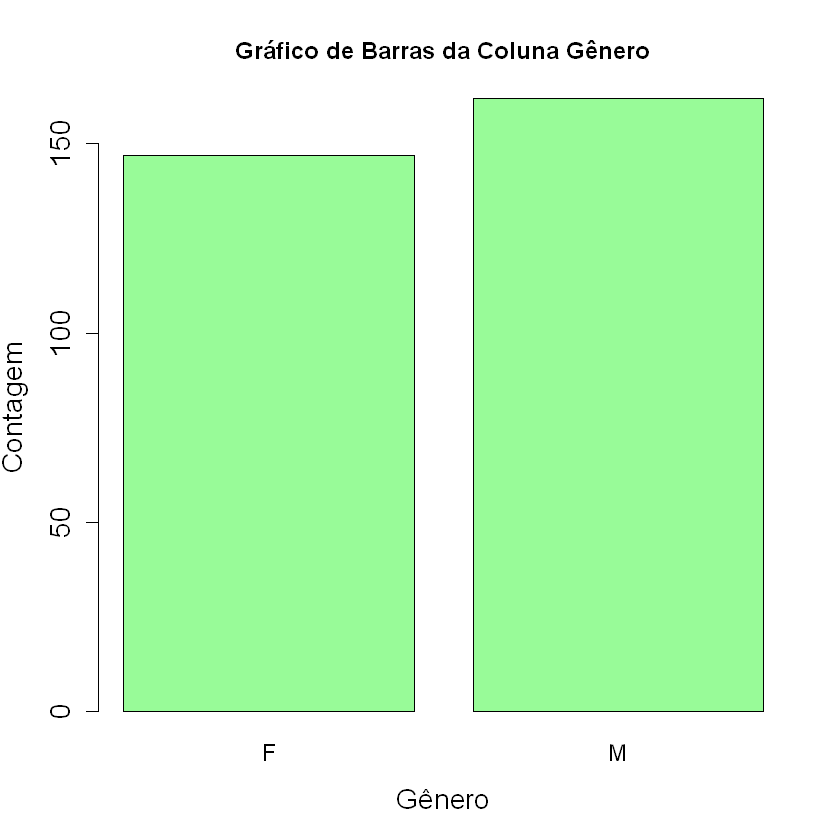

In [9]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$GENDER), 
        main = 'Gráfico de Barras da Coluna Gênero',
        xlab = 'Gênero', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [10]:
# Criando a tabela de contingência entre GENDER e a coluna target
table(df_lung_cancer$GENDER, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  F  22 125
  M  17 145

- A tabela mostra que tanto homens quanto mulheres apresentam uma distribuição uniforme em relação à presença de câncer de pulmão.

### 'AGE'	

In [11]:
#Verificando as estatísticas da coluna ge
summary(df_lung_cancer$AGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   57.00   62.00   62.67   69.00   87.00 

In [12]:
# Utilizando a biblioteca DescTools para calcular a moda 
Mode(df_lung_cancer$AGE)

[1] 64
attr(,"freq")
[1] 20

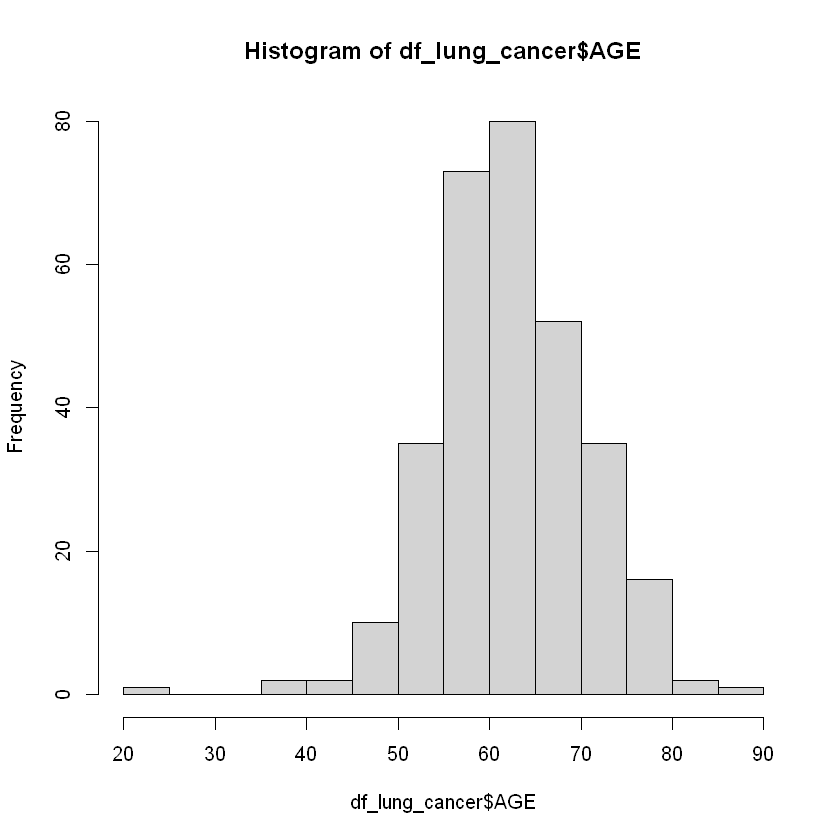

In [13]:
hist(df_lung_cancer$AGE)

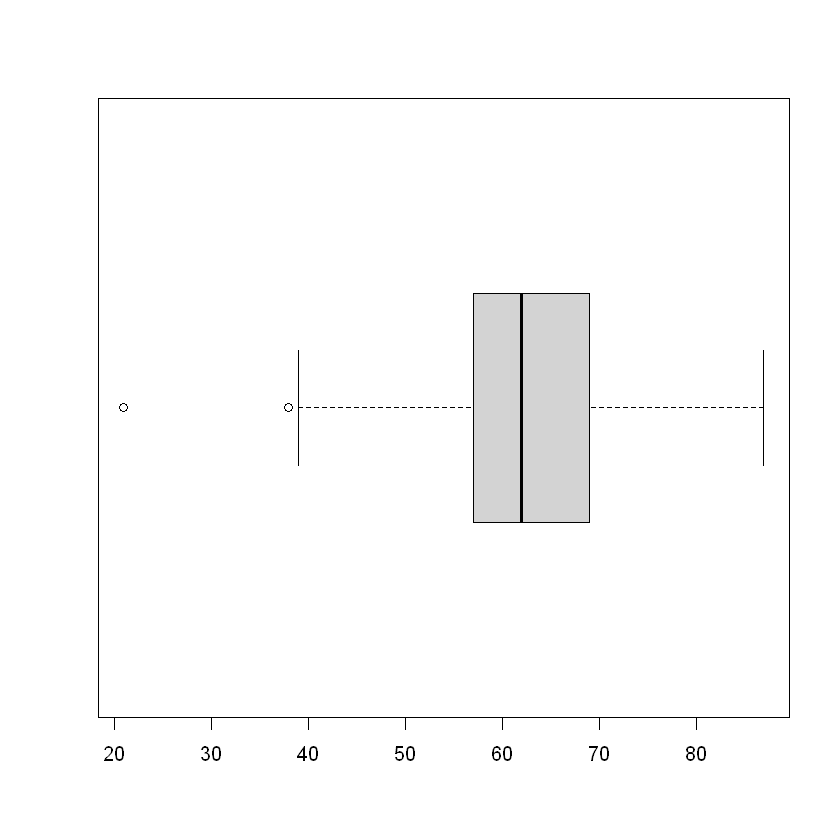

In [14]:
boxplot(df_lung_cancer$AGE,horizontal =TRUE)

- A análise da idade dos pacientes com câncer de pulmão no conjunto de dados revela que a maioria dos pacientes está na faixa etária de 50 a 70 anos, com uma distribuição aproximadamente simétrica. A mediana e a média são quase iguais, e a presença de poucos outliers sugere que a idade dos pacientes é bastante homogênea, sem grandes variações extremas.
- A distribuição tem uma cauda curta à esquerda (menos pacientes com idades abaixo de 50 anos) e à direita (menos pacientes com idades acima de 80 anos).
- Há alguns outliers identificados abaixo de 40 anos.
- A idade mínima dos pacientes é 21 anos e a máxima é 87 anos.
- A idade mais comum é 64 anos. 
- **Vamos realizar um teste t para verificar se há uma diferença significativa na média da idade dos pacientes em relação ao diagnóstico de câncer de pulmão**

In [15]:
# Dividindo os dados em dois grupos: com e sem câncer de pulmão
idade_com_cancer <- df_lung_cancer$AGE[df_lung_cancer$LUNG_CANCER == "YES"]
idade_sem_cancer <- df_lung_cancer$AGE[df_lung_cancer$LUNG_CANCER == "NO"]

In [16]:
# Teste de normalidade de Shapiro-Wilk para o grupo sem câncer de pulmão
shapiro.test(idade_sem_cancer)


	Shapiro-Wilk normality test

data:  idade_sem_cancer
W = 0.83382, p-value = 4.535e-05


In [17]:
# Teste de normalidade de Shapiro-Wilk para o grupo com câncer de pulmão
shapiro.test(idade_com_cancer)


	Shapiro-Wilk normality test

data:  idade_com_cancer
W = 0.98997, p-value = 0.0599


- O valor-p  do grupo sem câncer for menor que 0.05, portanto, rejeitamos a hipótese nula e concluímos que os dados não são normalmente distribuídos.
- Como os dados não seguem uma distribuição normal, vamos utilizar o teste de Mann-Whitney U (também conhecido como teste de Wilcoxon rank-sum) em vez do teste t.
    - Hipótese Nula (H0):Não há diferença significativa entre as distribuições das idades dos dois grupos (com e sem câncer de pulmão).
    - Hipótese Alternativa (H1):Há uma diferença significativa entre as distribuições das idades dos dois grupos (com e sem câncer de pulmão).

In [18]:
# Realizando o teste de Mann-Whitney U
wilcox.test(idade_com_cancer, idade_sem_cancer)


	Wilcoxon rank sum test with continuity correction

data:  idade_com_cancer and idade_sem_cancer
W = 5960.5, p-value = 0.1823
alternative hypothesis: true location shift is not equal to 0


- Como o valor-p é maior que o nível de significância comum de 0.05, falhamos em rejeitar a hipótese nula. Desta forma, não há evidência suficiente para afirmar que há uma diferença significativa entre as idades dos pacientes com câncer de pulmão e os pacientes sem câncer de pulmão. **Portanto, as idades dos pacientes não diferem significativamente entre os dois grupos de acordo com os dados disponíveis.**

### 'SMOKING'

In [19]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$SMOKING)


  1   2 
135 174 

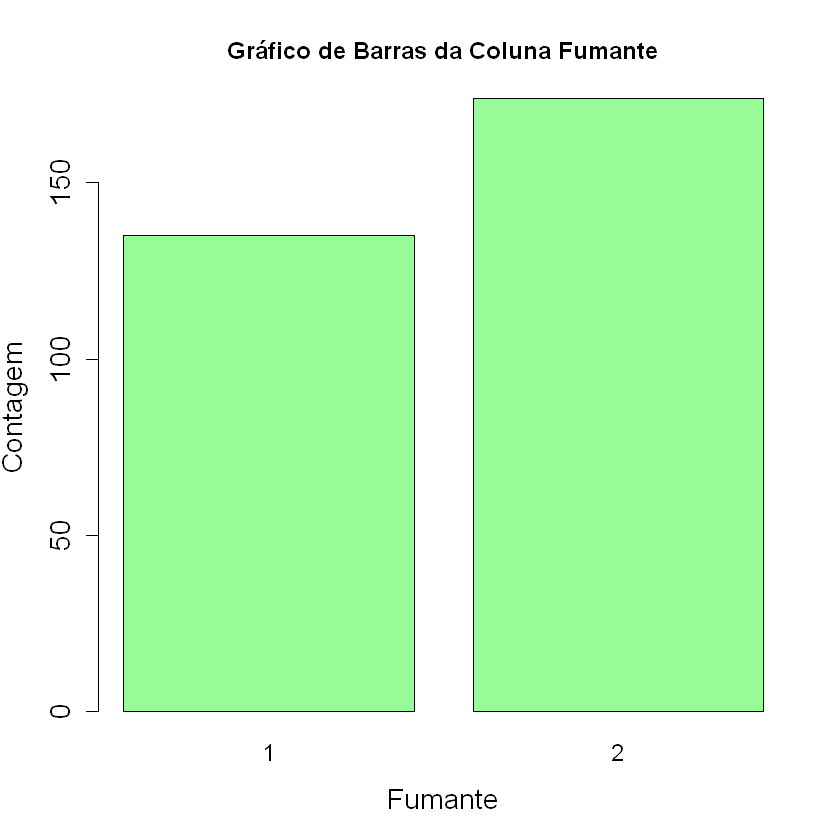

In [20]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$SMOKING), 
        main = 'Gráfico de Barras da Coluna Fumante',
        xlab = 'Fumante', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [21]:
# Criando a tabela de contingência entre Smoking e a coluna target
table(df_lung_cancer$SMOKING, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  20 115
  2  19 155

- A maioria dos indivíduos no conjunto de dados são fumantes
- A análise mostra que tanto fumantes quanto não fumantes têm uma alta incidência de câncer de pulmão no conjunto de dados, com uma ligeira tendência de maior incidência entre fumantes  em comparação com não fumantes. No entanto, é importante considerar outros fatores de risco e variáveis que podem influenciar a presença de câncer de pulmão para uma análise mais abrangente.
- **Também é importante considerar que a maior parte dos dados se refere a pacientes já diagnosticados com câncer e que podem ter parado de fumar justamente por conta do diagnóstico. Este fator pode influenciar a análise já que não temos uma variável com histórico de fumo dos pacientes**
- Além disso, o tabagismo é um fator de risco primário para o desenvolvimento do câncer de pulmão.

### 'YELLOW_FINGERS'

In [22]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$YELLOW_FINGERS)


  1   2 
133 176 

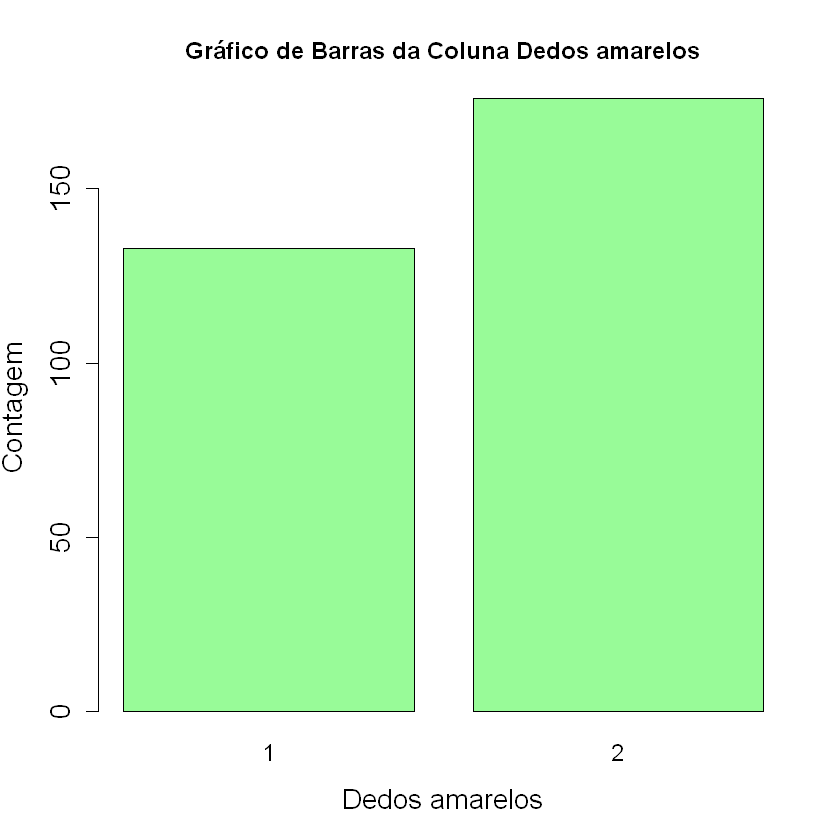

In [23]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$YELLOW_FINGERS), 
        main = 'Gráfico de Barras da Coluna Dedos amarelos',
        xlab = 'Dedos amarelos', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [24]:
# Criando a tabela de contingência entre YELLOW_FINGERS e a coluna target
table(df_lung_cancer$YELLOW_FINGERS, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  26 107
  2  13 163

- Um dos sinais visíveis dos efeitos do cigarro sobre a pele é o surgimento de manchas amareladas, especialmente nas pontas dos dedos. O contato da nicotina, aliado ao calor do cigarro, faz com que as unhas também fiquem impregnadas com a substância, resultando na coloração amarelada.
- A maioria dos indivíduos no conjunto de dados tem dedos amarelos (57%)
- A análise mostra que a presença de dedos amarelos está fortemente associada à presença de câncer de pulmão. Indivíduos com dedos amarelos têm uma maior incidência de câncer de pulmão em comparação com aqueles sem dedos amarelos em nosso dataset.

### 'ANXIETY'

In [25]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$ANXIETY)


  1   2 
155 154 

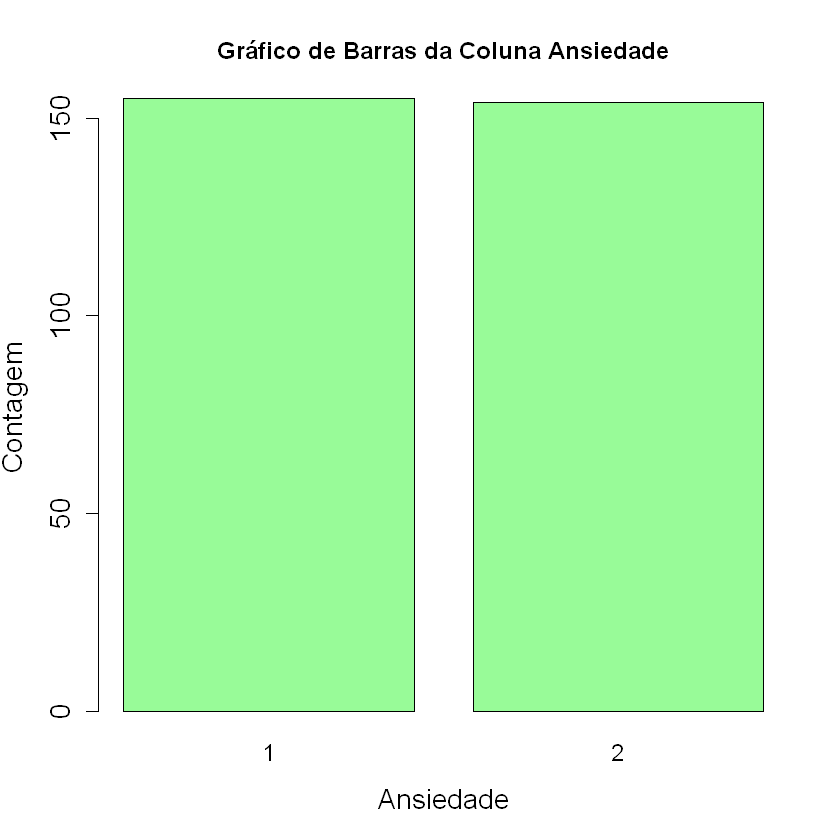

In [26]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$ANXIETY), 
        main = 'Gráfico de Barras da Coluna Ansiedade',
        xlab = 'Ansiedade', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [27]:
# Criando a tabela de contingência entre ANXIETY e a coluna target
table(df_lung_cancer$ANXIETY, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  27 128
  2  12 142

- A distribuição entre indivíduos com e sem ansiedade é quase igual.
- A análise mostra que a presença de ansiedade está associada a uma maior incidência de câncer de pulmão. 
- Estudos indicam que fumantes frequentemente apresentam índices consideráveis de ansiedade e depressão, utilizando o cigarro como uma estratégia de fuga dessas condições. Adicionalmente, pesquisas sugerem uma relação entre a existência de transtornos mentais prévios, especialmente os de ansiedade e humor, e o tabagismo. **Desta forma, o diagnóstico de ansiedade não é diretamente um fator para o câncer de pulmão, mas está associado a um fator comum, que é o uso do cigarro.**

### 'PEER_PRESSURE'

In [28]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$PEER_PRESSURE)


  1   2 
154 155 

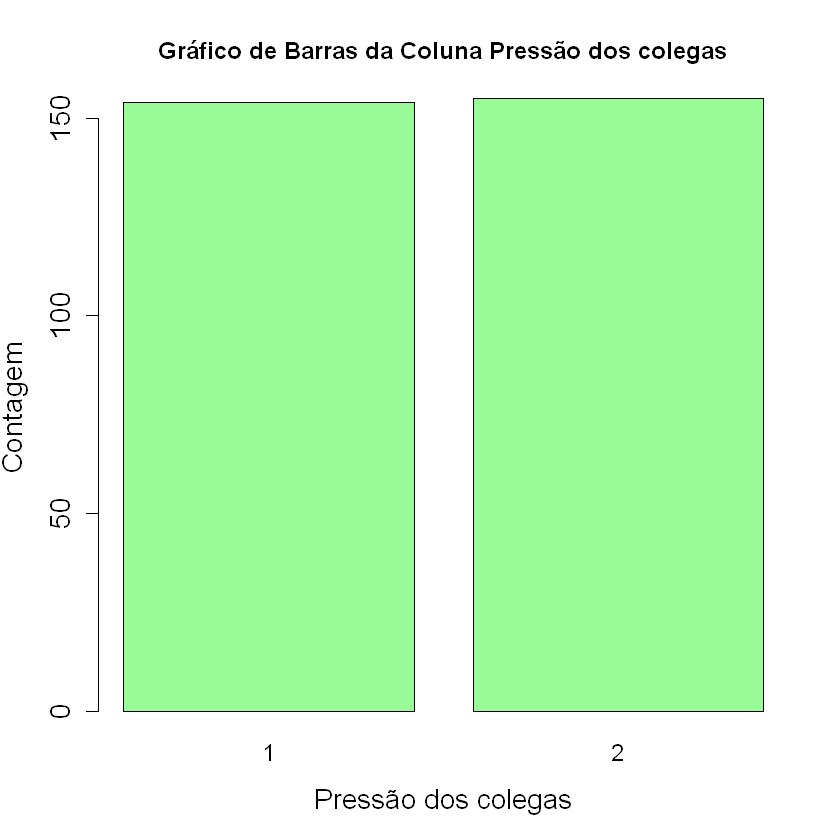

In [29]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$PEER_PRESSURE), 
        main = 'Gráfico de Barras da Coluna Pressão dos colegas',
        xlab = 'Pressão dos colegas', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [30]:
# Criando a tabela de contingência entre PEER_PRESSURE e a coluna target
table(df_lung_cancer$PEER_PRESSURE, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  29 125
  2  10 145

- A distribuição entre indivíduos que sofrem e não sofrem pressão dos colegas é praticamente igual.
- A análise mostra que a presença de pressão dos pares está associada a uma maior incidência de câncer de pulmão. 

### 'CHRONIC DISEASE'

In [31]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$`CHRONIC DISEASE`)


  1   2 
153 156 

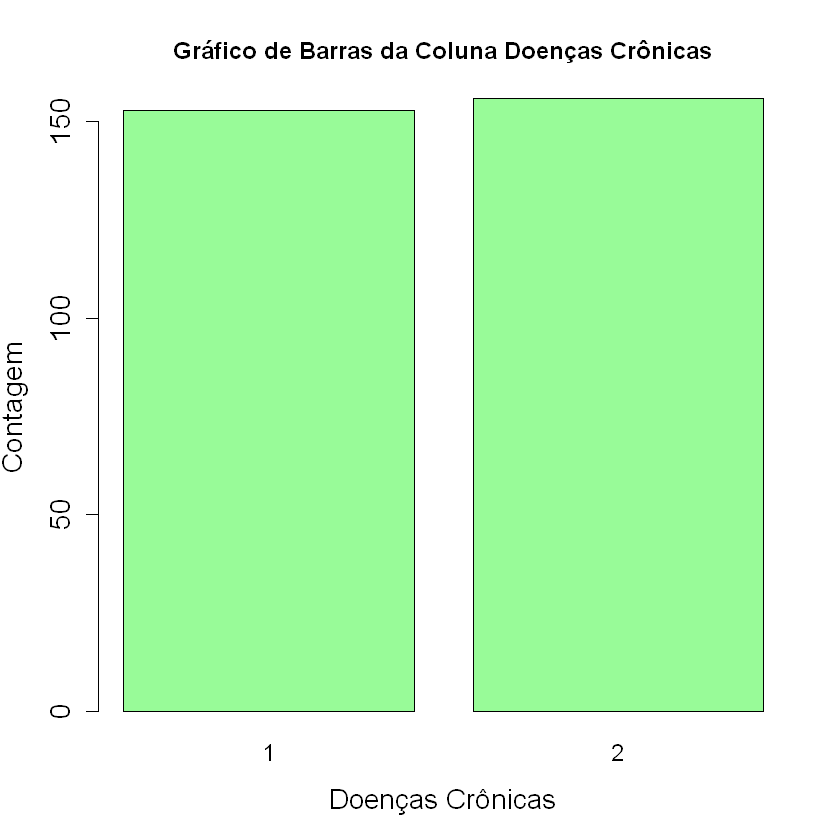

In [32]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$`CHRONIC DISEASE`), 
        main = 'Gráfico de Barras da Coluna Doenças Crônicas',
        xlab = 'Doenças Crônicas', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [33]:
# Criando a tabela de contingência entre CHRONIC DISEASE e a coluna target
table(df_lung_cancer$`CHRONIC DISEASE`, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  25 128
  2  14 142

- Há uma distribuição relativamente equilibrada entre os dois valores possíveis para "CHRONIC DISEASE" na amostra.
- A análise mostra que a presença de doença crônica está associada a uma maior incidência de câncer de pulmão. Indivíduos com doenças crônicas têm uma maior probabilidade de ter câncer de pulmão em comparação com aqueles que não têm doenças crônicas em nosso dataset.

### 'FATIGUE'

In [34]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$FATIGUE)


  1   2 
101 208 

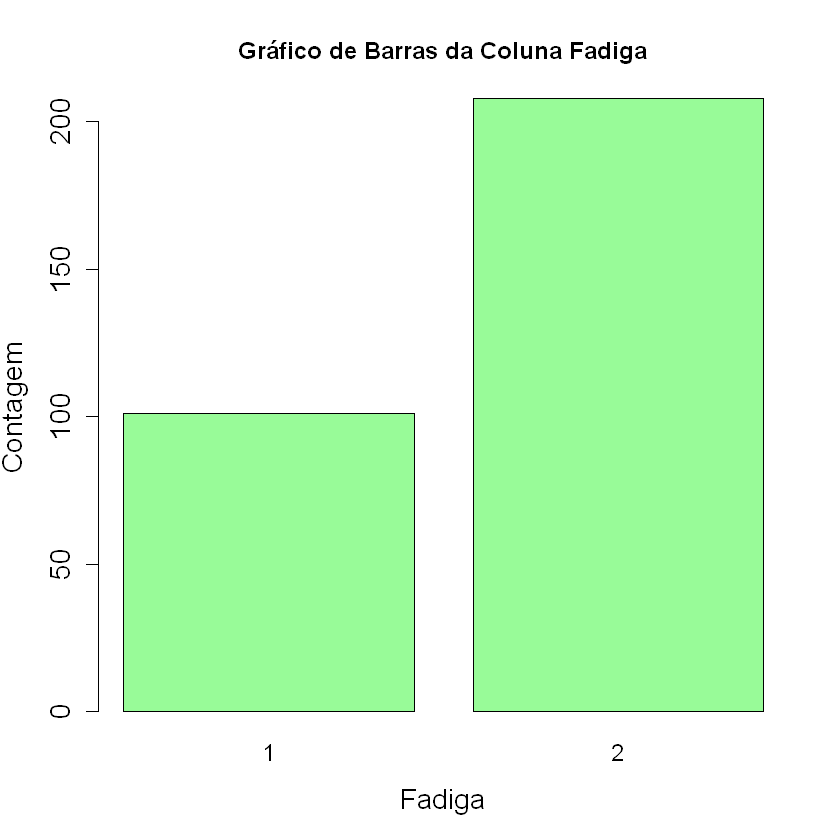

In [35]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$FATIGUE), 
        main = 'Gráfico de Barras da Coluna Fadiga',
        xlab = 'Fadiga', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [36]:
# Criando a tabela de contingência entre FATIGUE e a coluna target
table(df_lung_cancer$FATIGUE, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  20  81
  2  19 189

- A distribuição entre indivíduos que sofrem e não sofrem de fadiga é desigual, com uma maior proporção de indivíduos relatando fadiga.
- É importante destacar que os componentes do cigarro causam, nos fumantes, uma perda considerável da função pulmonar o que pode explicar a distribuição desigual na variável fadiga em fumantes.

### 'ALLERGY'

In [37]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$ALLERGY)


  1   2 
137 172 

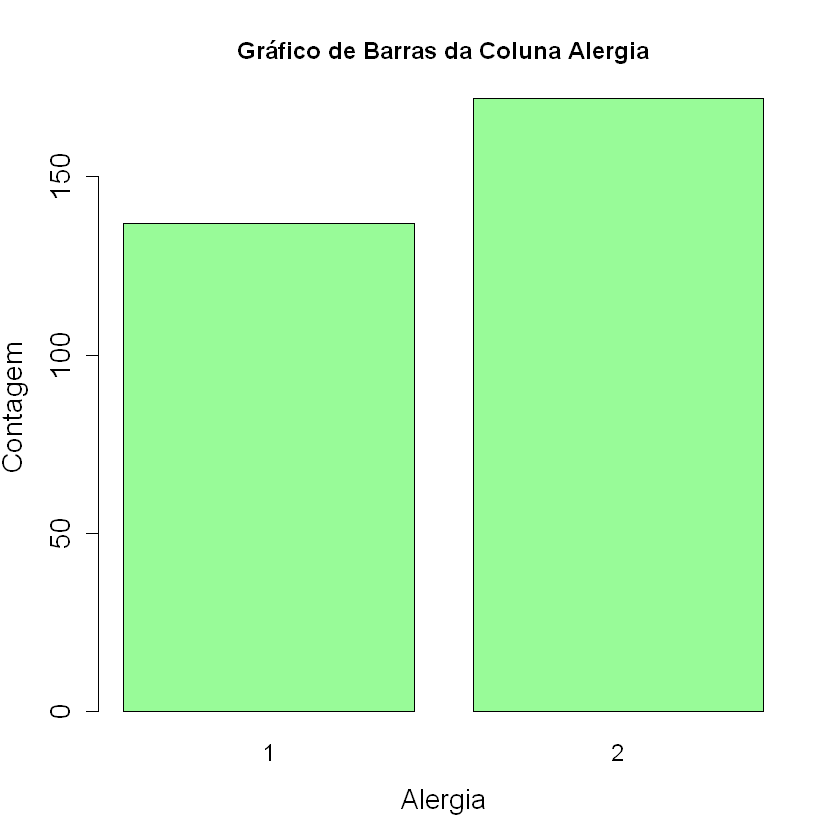

In [38]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$ALLERGY), 
        main = 'Gráfico de Barras da Coluna Alergia',
        xlab = 'Alergia', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [39]:
# Criando a tabela de contingência entre ALLERGY e a coluna target
table(df_lung_cancer$ALLERGY, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  34 103
  2   5 167

- A maioria dos indivíduos no conjunto de dados tem alergia.
- A análise mostra que a presença de alergia está fortemente associada a uma maior incidência de câncer de pulmão. 
- **É importante destacar que o tabagismo é um fator desencadeante importante para alergias respiratórias, como rinite e asma, por exemplo.** 

### 'WHEEZING'

In [40]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$WHEEZING)


  1   2 
137 172 

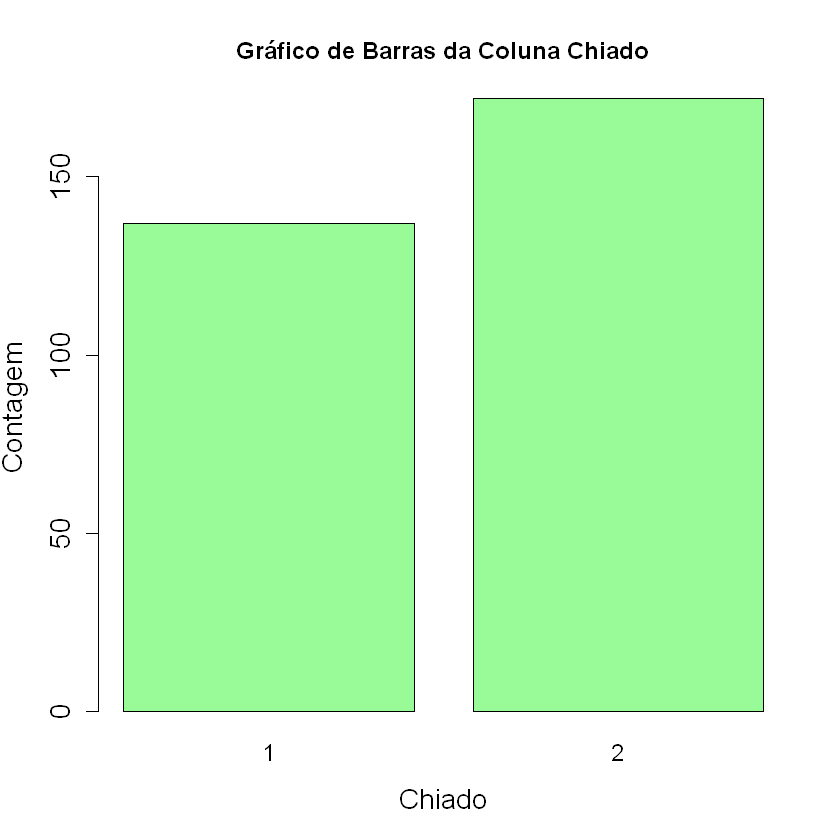

In [41]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$WHEEZING), 
        main = 'Gráfico de Barras da Coluna Chiado',
        xlab = 'Chiado', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [42]:
# Criando a tabela de contingência entre WHEEZING e a coluna target
table(df_lung_cancer$WHEEZING, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  30 107
  2   9 163

- A maioria dos indivíduos no conjunto de dados tem chiado 
- A análise mostra que a presença de chiado está fortemente associada a uma maior incidência de câncer de pulmão.
- O chiado é um sintoma respiratório que pode indicar problemas subjacentes nas vias aéreas. Fumantes e ex-fumantes, que são grupos de alto risco para câncer de pulmão, frequentemente apresentam chiado devido aos danos causados às vias aéreas pelo tabagismo.

### 'ALCOHOL CONSUMING' 

In [43]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$`ALCOHOL CONSUMING`)


  1   2 
137 172 

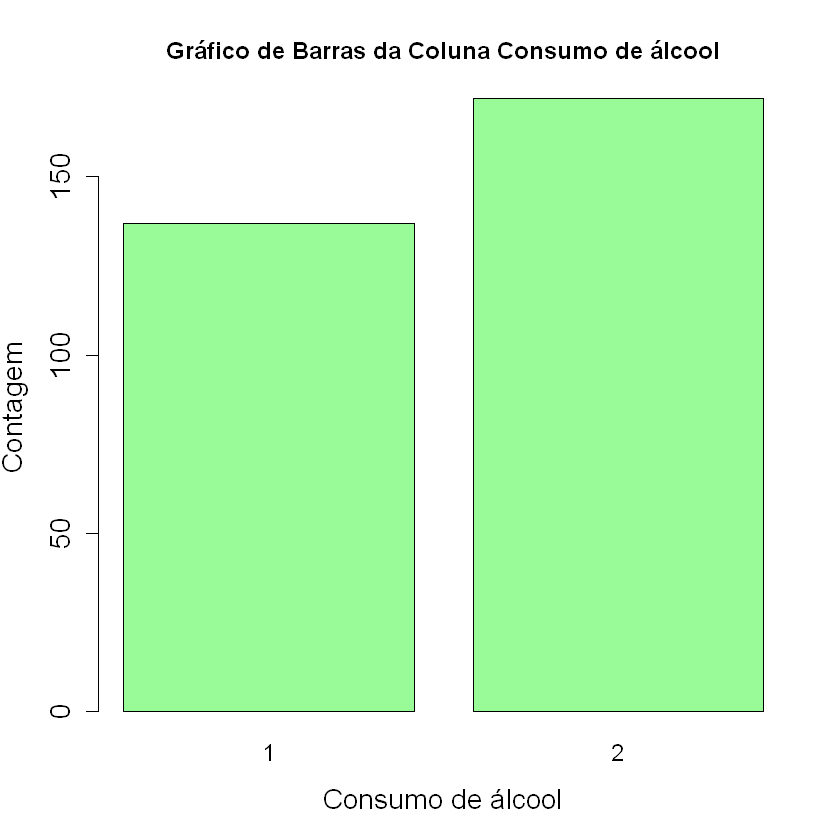

In [44]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$WHEEZING), 
        main = 'Gráfico de Barras da Coluna Consumo de álcool',
        xlab = 'Consumo de álcool', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [45]:
# Criando a tabela de contingência entre ALCOHOL CONSUMING e a coluna target
table(df_lung_cancer$`ALCOHOL CONSUMING`, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  32 105
  2   7 165

- A maioria dos indivíduos no conjunto de dados consome álcool
- A análise mostra que o consumo de álcool está fortemente associado a uma maior incidência de câncer de pulmão. 
- **O consumo de álcool pode estar relacionado a comportamentos de risco, como o tabagismo, que por sua vez aumenta o risco de desenvolvimento de câncer de pulmão.**

### 'COUGHING'

In [46]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$COUGHING)


  1   2 
130 179 

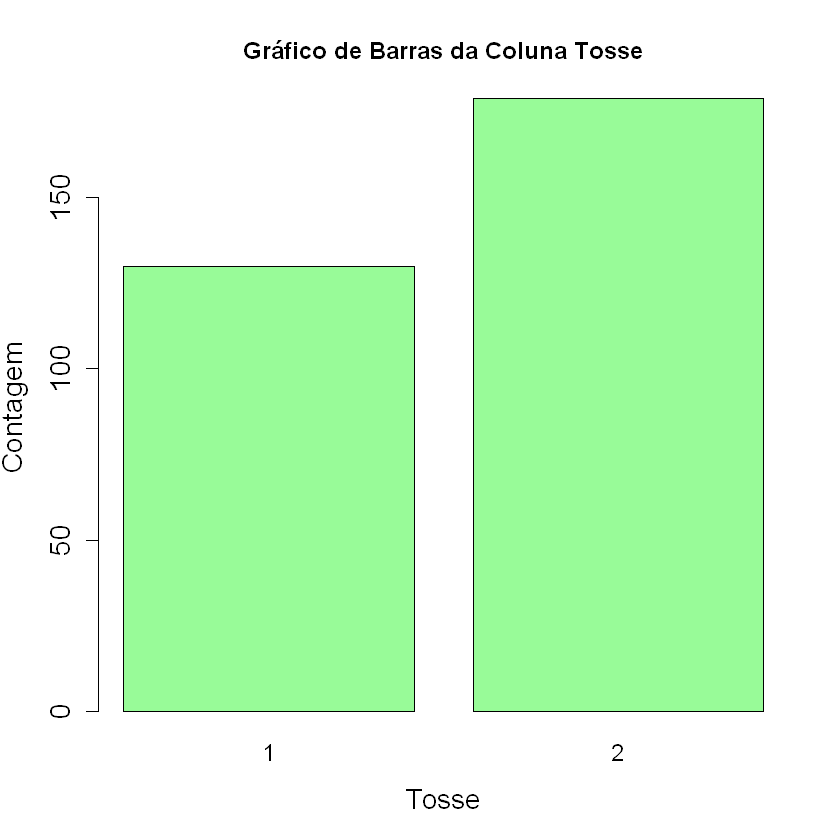

In [47]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$COUGHING), 
        main = 'Gráfico de Barras da Coluna Tosse',
        xlab = 'Tosse', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [48]:
# Criando a tabela de contingência entre COUGHING e a coluna target
table(df_lung_cancer$COUGHING, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  29 101
  2  10 169

- A análise mostra que a presença de tosse está fortemente associada a uma maior incidência de câncer de pulmão.
- A tosse é um sintoma comum em várias condições respiratórias, incluindo infecções, doenças pulmonares crônicas,etc. É importante destacar que a tosse pode ser causada pelo hábito de fumar. 

### 'SHORTNESS OF BREATH'

In [49]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$`SHORTNESS OF BREATH`)


  1   2 
111 198 

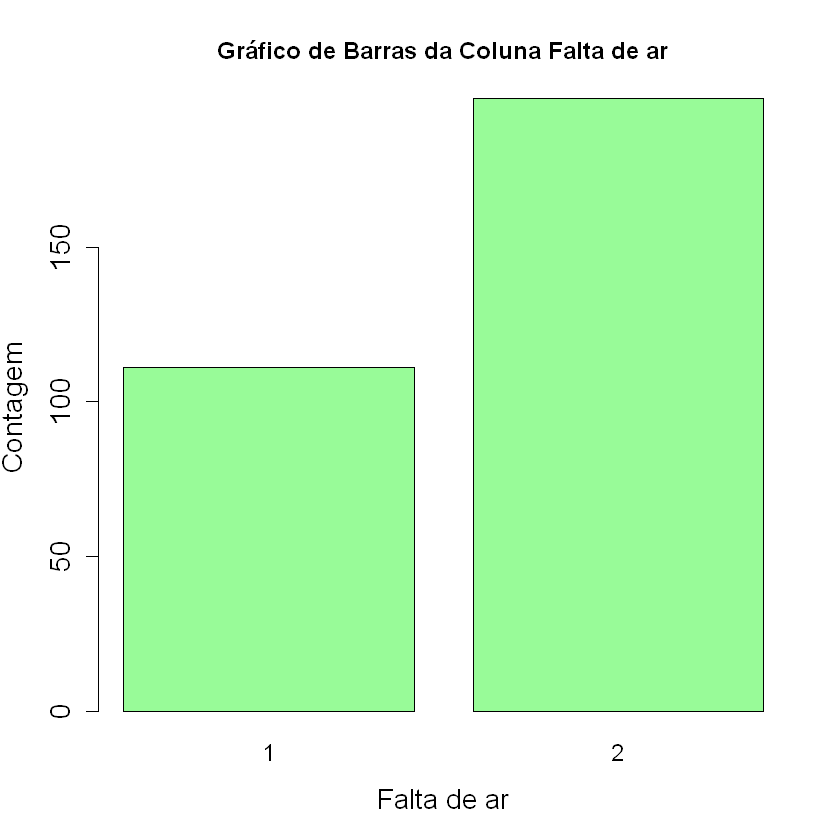

In [50]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$`SHORTNESS OF BREATH`), 
        main = 'Gráfico de Barras da Coluna Falta de ar',
        xlab = 'Falta de ar', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [51]:
# Criando a tabela de contingência entre COUGHING e a coluna target
table(df_lung_cancer$`SHORTNESS OF BREATH`, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  17  94
  2  22 176

- A análise mostra que a falta de ar está fortemente associada a uma maior incidência de câncer de pulmão. A falta de ar é um sintoma comum em várias condições respiratórias, incluindo infecções, doenças pulmonares crônicas, etc. É importante destacar que a falta de ar pode ser causada por diversos fatores, incluindo o hábito de fumar.

### 'SWALLOWING DIFFICULTY'

In [52]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$`SWALLOWING DIFFICULTY`)


  1   2 
164 145 

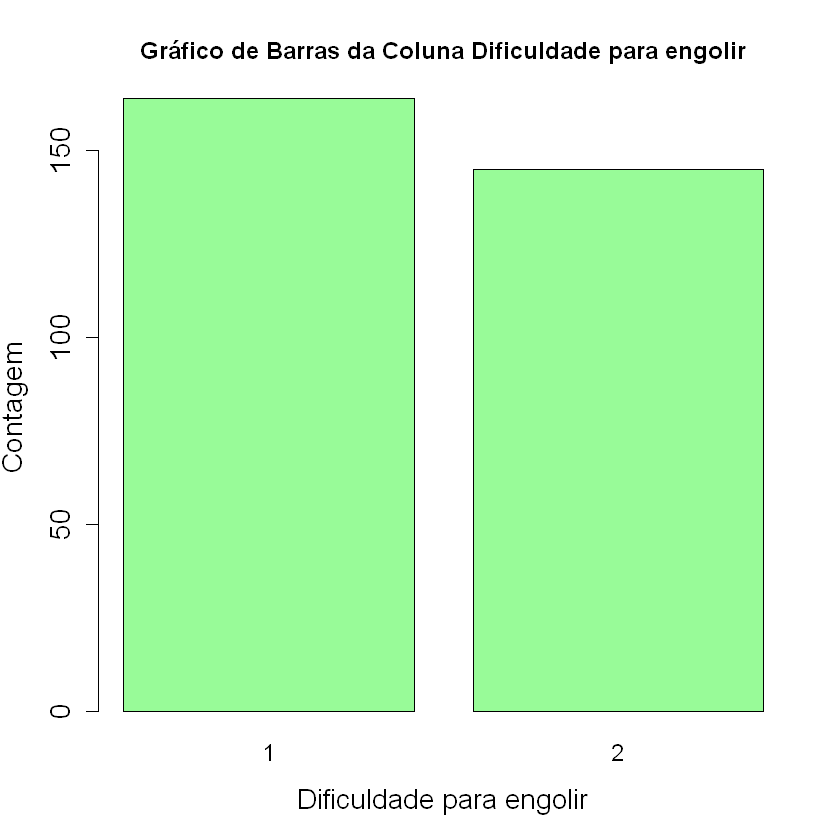

In [53]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$`SWALLOWING DIFFICULTY`), 
        main = 'Gráfico de Barras da Coluna Dificuldade para engolir',
        xlab = 'Dificuldade para engolir', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [54]:
# Criando a tabela de contingência entre COUGHING e a coluna target
table(df_lung_cancer$`SWALLOWING DIFFICULTY`, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  34 130
  2   5 140

- Partimos da mesma análise anterior: A análise mostra que a dificuldade para engolir está fortemente associada a uma maior incidência de câncer de pulmão. A dificuldade para engolir pode ser um sintoma comum em várias condições respiratórias, incluindo infecções, doenças pulmonares crônicas etc. É importante destacar que essa dificuldade pode ser influenciada por diversos fatores, incluindo o hábito de fumar.

### 'CHEST PAIN"

In [55]:
#Verificando a frequência para cada valor único na coluna 
table(df_lung_cancer$`CHEST PAIN`)


  1   2 
137 172 

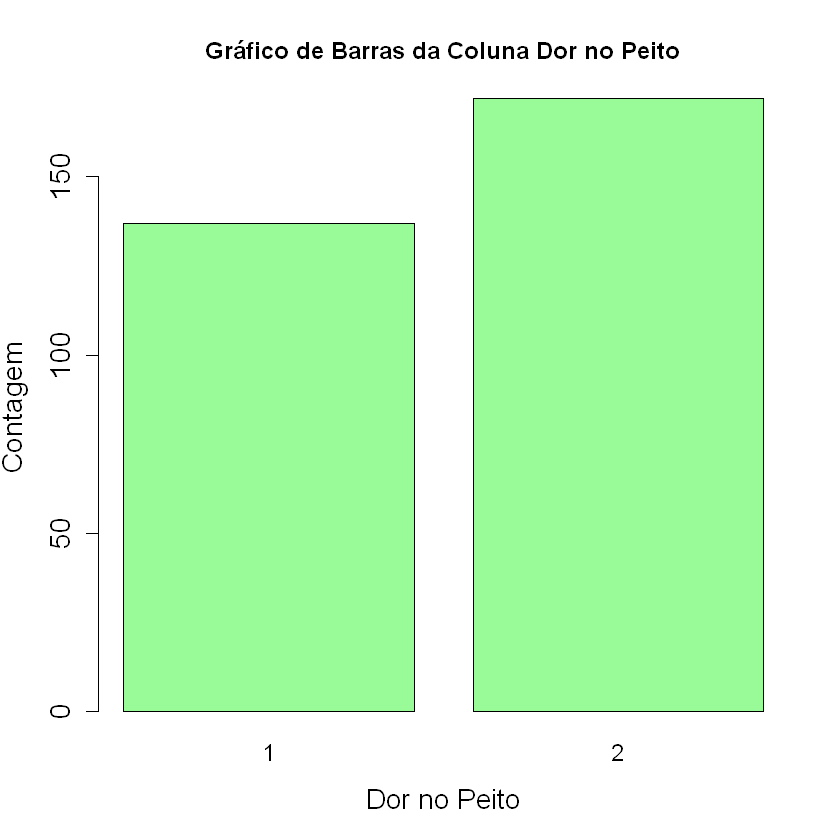

In [56]:
# Criando o gráfico de barras com as frequencias
barplot(table(df_lung_cancer$`CHEST PAIN`), 
        main = 'Gráfico de Barras da Coluna Dor no Peito',
        xlab = 'Dor no Peito', 
        ylab = 'Contagem', 
        col = 'palegreen',
        cex.axis = 1.4, 
        cex.lab = 1.4,
        cex.names = 1.17)

In [57]:
# Criando a tabela de contingência entre COUGHING e a coluna target
table(df_lung_cancer$`CHEST PAIN`, df_lung_cancer$LUNG_CANCER) 

   
     NO YES
  1  27 110
  2  12 160

- A análise mostra que a dor no peito está fortemente associada a uma maior incidência de câncer de pulmão. A dor no peito pode ser um sintoma comum em várias condições respiratórias, incluindo infecções, doenças pulmonares crônicas, etc. É importante destacar que a dor no peito pode ser influenciada por diversos fatores, incluindo o hábito de fumar.

- otimizar log-loss
- focal loss
- inveter labels

In [58]:
table(df_lung_cancer$LUNG_CANCER)


 NO YES 
 39 270 

## 3 - Machine Learning

- Exemplo de uso do pacote Tidymodels para modelagem: 
    - https://www.tidymodels.org/start/case-study/
    - https://www.tidymodels.org/

### Métrica de escolha: Recall
- Em modelos de machine learning voltados para a previsão de doenças graves, como o câncer de pulmão, a escolha das métricas de avaliação é crucial para garantir a eficácia do modelo. Entre as várias métricas disponíveis, o recall é particularmente importante para este tipo de problema.
- O recall, também conhecido como sensibilidade, mede a capacidade do modelo de identificar corretamente todas as instâncias positivas (neste caso, todos os pacientes que realmente têm câncer de pulmão), ele também garante a minimização de Falsos Negativos.

In [59]:
library(tidymodels)
library(themis) # Para lidar com dados desbalanceados

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.4.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



- Referência para lidar com classes desbalanceadas:
    - https://themis.tidymodels.org/
    - https://juliasilge.com/blog/himalayan-climbing/
    - https://www.tidyverse.org/blog/2022/05/case-weights/

In [60]:
# Armazenando o DF em um novo Dataframe
df_lung_cancer_ml <- df_lung_cancer 

In [61]:
head(df_lung_cancer_ml)

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


In [62]:
#Transformando a coluna alvo em fator
df_lung_cancer_ml <-  df_lung_cancer_ml %>%
mutate(LUNG_CANCER = as.factor(LUNG_CANCER))

In [63]:
#Verificando os dados
glimpse(df_lung_cancer_ml)

Rows: 309
Columns: 16
$ GENDER                  <chr> "M", "M", "F", "M", "F", "F", "M", "F", "F", "…
$ AGE                     <dbl> 69, 74, 59, 63, 63, 75, 52, 51, 68, 53, 61, 72…
$ SMOKING                 <dbl> 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1…
$ YELLOW_FINGERS          <dbl> 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2…
$ ANXIETY                 <dbl> 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2…
$ PEER_PRESSURE           <dbl> 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2…
$ `CHRONIC DISEASE`       <dbl> 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2…
$ FATIGUE                 <dbl> 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2…
$ ALLERGY                 <dbl> 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2…
$ WHEEZING                <dbl> 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2…
$ `ALCOHOL CONSUMING`     <dbl> 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1…
$ COUGHING                <dbl> 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2…
$ `SHORTNESS OF BR

In [64]:
#Dividindo os dados, padrão 75% dados treino, divisão deve ser estratificada
set.seed(123)
splits  <- initial_split(df_lung_cancer_ml, strata = LUNG_CANCER)
splits 

<Training/Testing/Total>
<231/78/309>

In [65]:
#Separando os DFs
df_training <- training(splits)
df_test  <- testing(splits)

### Logistic Regression

In [66]:
# Semente para reprodutibilidade
set.seed(1234)

# Definindo a receita 
lung_cancer_recipe <- 
  recipe(LUNG_CANCER ~ ., data = df_training) %>%
  step_dummy(GENDER) %>%            # Converte GENDER em dummy
  step_zv(all_predictors()) %>%     # Remove variáveis com zero variância
  step_normalize(all_predictors())  # Normaliza todas as variáveis preditoras

# Especificação do modelo
model_lr <- 
  logistic_reg() %>%
  set_engine('glm')

# Criando o workflow
lr_workflow <- 
  workflow() %>% 
  add_model(model_lr) %>% 
  add_recipe(lung_cancer_recipe)

# Validação cruzada estratificada
folds <- vfold_cv(df_training, v = 10, strata = LUNG_CANCER)

# Definindo as métricas
metrics <- metric_set(recall, accuracy)

# Ajustando do modelo com validação cruzada
lr_fit <- 
  lr_workflow %>%
  fit_resamples(folds, metrics = metrics)

# Visualizar os resultados
lr_fit %>% collect_metrics()

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9179018,10,0.009889083,Preprocessor1_Model1
recall,binary,0.6166667,10,0.061111111,Preprocessor1_Model1


In [67]:
#Métricas por fold
collect_metrics(lr_fit, summarize = FALSE)

id,.metric,.estimator,.estimate,.config
<chr>,<chr>,<chr>,<dbl>,<chr>
Fold01,recall,binary,0.3333333,Preprocessor1_Model1
Fold01,accuracy,binary,0.8750000,Preprocessor1_Model1
Fold02,recall,binary,0.3333333,Preprocessor1_Model1
Fold02,accuracy,binary,0.9166667,Preprocessor1_Model1
Fold03,recall,binary,1.0000000,Preprocessor1_Model1
Fold03,accuracy,binary,0.9565217,Preprocessor1_Model1
Fold04,recall,binary,0.6666667,Preprocessor1_Model1
Fold04,accuracy,binary,0.9130435,Preprocessor1_Model1
Fold05,recall,binary,0.6666667,Preprocessor1_Model1


### RandomForest

In [68]:
library(ranger)

# Semente para reprodutibilidade
set.seed(1234)

# Pré-processamento
lung_cancer_recipe <- 
  recipe(LUNG_CANCER ~ ., data = df_training) %>%
  step_mutate(GENDER = factor(GENDER)) %>%  # Converte GENDER em fator
  step_zv(all_predictors())     # Remove variáveis com zero variância

# Especificando o modelo de random forest com hiperparâmetros a serem ajustados
rf_mod <- 
  rand_forest(mtry = tune(), min_n = tune(), trees = tune()) %>% 
  set_engine('ranger') %>%  
  set_mode('classification')

# Workflow
rf_workflow <- 
  workflow() %>% 
  add_model(rf_mod) %>% 
  add_recipe(lung_cancer_recipe)

# Definindo a grade de hiperparâmetros com grid_regular
rf_grid <- grid_regular(
  mtry(range = c(1, 4)),
  trees(range = c(50, 200)),
  min_n(range = c(2, 10)),
  levels = c(4, 4, 5)  # Definindo o número de níveis para cada hiperparâmetro
)

# Validação cruzada
folds <- vfold_cv(df_training, v = 10, strata = LUNG_CANCER)

# Definindo as métricas
metrics <- metric_set(recall, accuracy)

# Ajustando do modelo com validação cruzada e tunagem de hiperparâmetros
tune_results <- tune_grid(
  rf_workflow,
  resamples = folds,
  grid = rf_grid,
  metrics = metrics,  
  control = control_grid(save_pred = TRUE)
)

# Visualizando os resultados
tune_results %>% collect_metrics()

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,50,2,accuracy,binary,0.87005929,10,0.006559558,Preprocessor1_Model01
1,50,2,recall,binary,0.03333333,10,0.033333333,Preprocessor1_Model01
2,50,2,accuracy,binary,0.90485837,10,0.021051959,Preprocessor1_Model02
2,50,2,recall,binary,0.45000000,10,0.099535960,Preprocessor1_Model02
3,50,2,accuracy,binary,0.92188735,10,0.017961742,Preprocessor1_Model03
3,50,2,recall,binary,0.58333333,10,0.083333333,Preprocessor1_Model03
4,50,2,accuracy,binary,0.90503953,10,0.019996547,Preprocessor1_Model04
4,50,2,recall,binary,0.51666667,10,0.087665188,Preprocessor1_Model04
1,100,2,accuracy,binary,0.87025692,10,0.006242265,Preprocessor1_Model05


In [69]:
# Coletando e exibindo as métricas dos melhores parâmetros
best_metrics <- show_best(tune_results, metric = 'recall', n = 1)
best_metrics

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,50,2,recall,binary,0.5833333,10,0.08333333,Preprocessor1_Model03


### Vamos tentar diminuir o erro corrigindo o desbalanceamento de classes

In [70]:
table(df_training$LUNG_CANCER)


 NO YES 
 29 202 

In [71]:
peso_no <- 231 / 29
peso_yes <- 231 / 202

peso_no
peso_yes

[1] 7.965517

[1] 1.143564

In [72]:
# Adicionando pesos de importância ao conjunto de dados
df_training <- df_training %>%
  mutate(
    case_wts = ifelse(LUNG_CANCER == 'NO', peso_no, peso_yes),
    case_wts = importance_weights(case_wts)
  )

In [73]:
head(df_training)

GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,case_wts
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<imp_wts>
F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,7.965517
F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO,7.965517
F,60,2,1,1,1,1,2,1,1,1,1,2,1,1,NO,7.965517
F,61,1,1,1,1,2,2,1,1,1,1,2,1,1,NO,7.965517
F,21,2,1,1,1,2,2,2,1,1,1,2,1,1,NO,7.965517
M,69,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,7.965517


In [74]:
# Semente para reprodutibilidade
set.seed(1234)

# Pré-processamento
lung_cancer_recipe <- 
  recipe(LUNG_CANCER ~ ., data = df_training) %>%
  step_mutate(GENDER = factor(GENDER)) %>%  # Converte GENDER em fator
  step_zv(all_predictors())     # Remove variáveis com zero variância

# Especificando o modelo de random forest com hiperparâmetros a serem ajustados
rf_mod <- 
  rand_forest(mtry = tune(), min_n = tune(), trees = tune()) %>% 
  set_engine('ranger') %>%  
  set_mode('classification')

# Criando o workflow e adicionando os pesos de caso
rf_workflow <- 
  workflow() %>% 
  add_model(rf_mod) %>% 
  add_recipe(lung_cancer_recipe) %>% 
  add_case_weights(case_wts)

# Definindo a grade de hiperparâmetros com grid_regular
rf_grid <- grid_regular(
  mtry(range = c(1, 4)),
  trees(range = c(50, 200)),
  min_n(range = c(2, 10)),
  levels = c(4, 4, 5)  # Definindo o número de níveis para cada hiperparâmetro
)

# Validação cruzada
folds <- vfold_cv(df_training, v = 10, strata = LUNG_CANCER)

# Definindo as métricas
metrics <- metric_set(recall, accuracy)

# Ajustando do modelo com validação cruzada e tunagem de hiperparâmetros
tune_results <- tune_grid(
  rf_workflow,
  resamples = folds,
  grid = rf_grid,
  metrics = metrics,  
  control = control_grid(save_pred = TRUE)
)

# Visualizando os resultados
tune_results %>% collect_metrics()

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,50,2,accuracy,binary,0.8997530,10,0.02287741,Preprocessor1_Model01
1,50,2,recall,binary,0.7500000,10,0.07556373,Preprocessor1_Model01
2,50,2,accuracy,binary,0.8999506,10,0.02267387,Preprocessor1_Model02
2,50,2,recall,binary,0.7166667,10,0.08624541,Preprocessor1_Model02
3,50,2,accuracy,binary,0.9001318,10,0.02603058,Preprocessor1_Model03
3,50,2,recall,binary,0.6500000,10,0.08766519,Preprocessor1_Model03
4,50,2,accuracy,binary,0.8916337,10,0.02528317,Preprocessor1_Model04
4,50,2,recall,binary,0.6833333,10,0.09444444,Preprocessor1_Model04
1,100,2,accuracy,binary,0.8959816,10,0.02165151,Preprocessor1_Model05


In [75]:
# Coletando e exibindo as métricas dos melhores parâmetros
best_metrics <- show_best(tune_results, metric = 'recall', n = 1)
best_metrics

mtry,trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,50,10,recall,binary,0.7833333,10,0.07876359,Preprocessor1_Model65


### KNN
- O  KNN não permite explicitar os pesos da classe, desta forma, usaremos outras abordagens:
- SMOTE gera exemplos sintéticos interpolando entre exemplos existentes da classe minoritária

In [76]:
library(kknn)
library(themis)

# Semente para reprodutibilidade
set.seed(1234)

# Definindo a receita 
lung_cancer_recipe <- 
  recipe(LUNG_CANCER ~ ., data = df_training) %>%
  step_dummy(GENDER) %>%            # Converte GENDER em dummy
  step_zv(all_predictors()) %>%     # Remove variáveis com zero variância
  step_normalize(all_predictors()) %>%  # Normaliza todas as variáveis preditoras
  step_smote(LUNG_CANCER)            # Aplica a técnica SMOTE para lidar com desbalanceamento

# Especificação do modelo KNN
knn_mod <- 
  nearest_neighbor(neighbors = tune(), weight_func = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('classification')

# Criando o workflow
knn_workflow <- 
  workflow() %>% 
  add_model(knn_mod) %>% 
  add_recipe(lung_cancer_recipe)

# Definindo a grade de hiperparâmetros
knn_grid <- grid_regular(
  neighbors(range = c(2, 15)),  # Número de vizinhos a serem considerados
  weight_func(c('rectangular', 'triangular', 'epanechnikov')),  # Métodos de ponderação 
  levels = c(14, 3)             # 14 níveis para neighbors e 3 para weight_func
)

# Validação cruzada estratificada
folds <- vfold_cv(df_training, v = 10, strata = LUNG_CANCER)

# Definindo as métricas
metrics <- metric_set(recall, accuracy, precision)

# Ajuste do modelo com validação cruzada e tunagem de hiperparâmetros
tune_results <- tune_grid(
  knn_workflow,
  resamples = folds,
  grid = knn_grid,
  metrics = metrics,
  control = control_grid(save_pred = TRUE)
)

# Visualizando os resultados
tune_results %>% collect_metrics()

neighbors,weight_func,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,epanechnikov,accuracy,binary,0.9001318,10,0.01479631,Preprocessor1_Model01
2,epanechnikov,precision,binary,0.6016667,10,0.06480979,Preprocessor1_Model01
2,epanechnikov,recall,binary,0.7166667,10,0.07049210,Preprocessor1_Model01
3,epanechnikov,accuracy,binary,0.9001318,10,0.01479631,Preprocessor1_Model02
3,epanechnikov,precision,binary,0.6016667,10,0.06480979,Preprocessor1_Model02
3,epanechnikov,recall,binary,0.7166667,10,0.07049210,Preprocessor1_Model02
4,epanechnikov,accuracy,binary,0.8912385,10,0.01668811,Preprocessor1_Model03
4,epanechnikov,precision,binary,0.5766667,10,0.06908574,Preprocessor1_Model03
4,epanechnikov,recall,binary,0.7166667,10,0.07049210,Preprocessor1_Model03


In [77]:
# Coletando e exibindo as métricas dos melhores parâmetros
best_metrics <- show_best(tune_results, metric = 'recall', n = 1)
best_metrics

neighbors,weight_func,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rectangular,recall,binary,0.85,10,0.06309898,Preprocessor1_Model20


 - ADASYN gera exemplos sintéticos adaptando-se à distribuição das instâncias minoritárias, gerando mais exemplos sintéticos para instâncias minoritárias mais difíceis de classificar.

In [78]:
# Semente para reprodutibilidade
set.seed(1234)

# Definindo a receita 
lung_cancer_recipe <- 
  recipe(LUNG_CANCER ~ ., data = df_training) %>%
  step_dummy(GENDER) %>%            # Converte GENDER em dummy
  step_zv(all_predictors()) %>%     # Remove variáveis com zero variância
  step_normalize(all_predictors()) %>%  # Normaliza todas as variáveis preditoras
  step_adasyn(LUNG_CANCER)            # Aplica a técnica adasyn para lidar com desbalanceamento

# Especificação do modelo KNN
knn_mod <- 
  nearest_neighbor(neighbors = tune(), weight_func = tune()) %>% 
  set_engine('kknn') %>% 
  set_mode('classification')

# Criando o workflow
knn_workflow <- 
  workflow() %>% 
  add_model(knn_mod) %>% 
  add_recipe(lung_cancer_recipe)

# Definindo a grade de hiperparâmetros
knn_grid <- grid_regular(
  neighbors(range = c(2, 15)),  # Número de vizinhos a serem considerados
  weight_func(c('rectangular', 'triangular', 'epanechnikov')),  # Métodos de ponderação 
  levels = c(14, 3)             # 14 níveis para neighbors e 3 para weight_func
)

# Validação cruzada estratificada
folds <- vfold_cv(df_training, v = 10, strata = LUNG_CANCER)

# Definindo as métricas
metrics <- metric_set(recall, accuracy, precision)

# Ajuste do modelo com validação cruzada e tunagem de hiperparâmetros
tune_results <- tune_grid(
  knn_workflow,
  resamples = folds,
  grid = knn_grid,
  metrics = metrics,
  control = control_grid(save_pred = TRUE)
)

# Visualizando os resultados
tune_results %>% collect_metrics()

neighbors,weight_func,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,epanechnikov,accuracy,binary,0.9046607,10,0.01426794,Preprocessor1_Model01
2,epanechnikov,precision,binary,0.6166667,10,0.06166416,Preprocessor1_Model01
2,epanechnikov,recall,binary,0.7166667,10,0.07049210,Preprocessor1_Model01
3,epanechnikov,accuracy,binary,0.8914196,10,0.01656196,Preprocessor1_Model02
3,epanechnikov,precision,binary,0.5766667,10,0.06908574,Preprocessor1_Model02
3,epanechnikov,recall,binary,0.7166667,10,0.07049210,Preprocessor1_Model02
4,epanechnikov,accuracy,binary,0.8914196,10,0.01656196,Preprocessor1_Model03
4,epanechnikov,precision,binary,0.5766667,10,0.06908574,Preprocessor1_Model03
4,epanechnikov,recall,binary,0.7166667,10,0.07049210,Preprocessor1_Model03


In [79]:
# Coletando e exibindo as métricas dos melhores parâmetros
best_metrics <- show_best(tune_results, metric = 'recall', n = 1)
best_metrics

neighbors,weight_func,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,rectangular,recall,binary,0.9,10,0.05091751,Preprocessor1_Model22


In [80]:
# Selecionando os melhores hiperparâmetros
best_params <- select_best(tune_results, metric = 'recall')

# Finalizando o workflow com os melhores hiperparâmetros
final_knn_workflow <- knn_workflow %>%
  finalize_workflow(best_params)

# Ajustando o modelo final com todo o conjunto de dados de treinamento
final_knn_model <- final_knn_workflow %>%
  fit(data = df_training)

final_knn_model

══ Workflow [trained] ══════════════════════════════════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_dummy()
• step_zv()
• step_normalize()
• step_adasyn()

── Model ───────────────────────────────────────────────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.0990099
Best kernel: rectangular
Best k: 9

In [81]:
# Fazendo previsões nos dados de teste
predictions <- predict(final_knn_model, new_data = df_test)
head(predictions)

.pred_class
<fct>
YES
NO
YES
YES
NO
YES


In [82]:
# Avaliando as previsões
prediction_results <- predictions %>%
  bind_cols(df_test) %>%
  metrics(truth = LUNG_CANCER, estimate = .pred_class)

prediction_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9000000
accuracy,binary,0.8589744
precision,binary,0.4736842


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


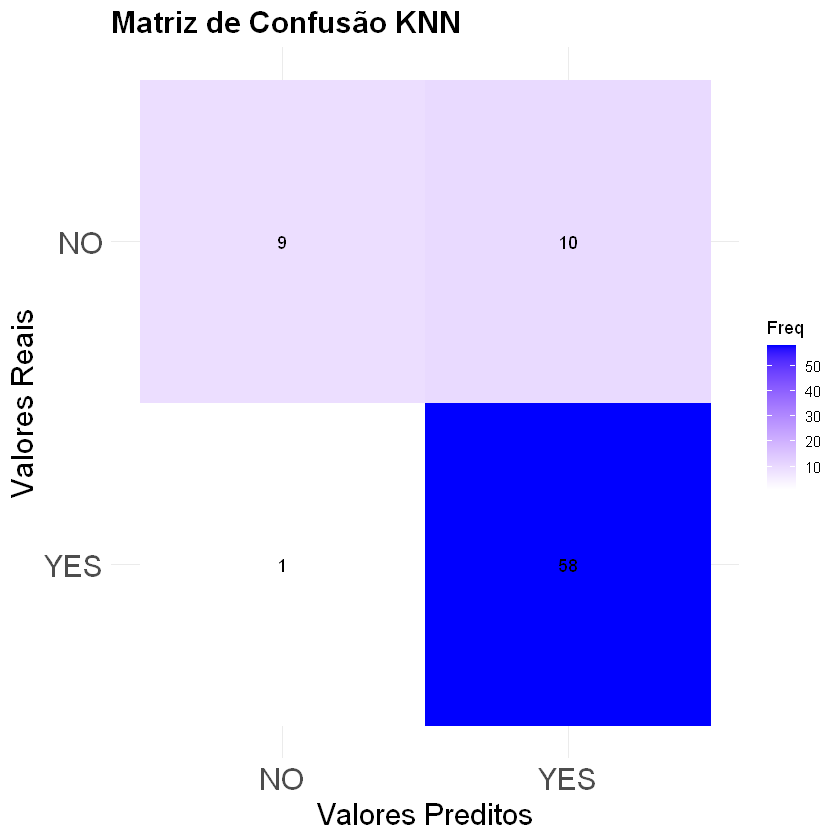

In [83]:
# Gerando a matriz de confusão
confusion_matrix <- predictions %>%
  bind_cols(df_test) %>%
  conf_mat(truth = LUNG_CANCER, estimate = .pred_class)

# Visualizando a matriz de confusão como plot 
autoplot(confusion_matrix, type = 'heatmap') +
  labs(title = 'Matriz de Confusão KNN',
       x = "Valores Preditos",
       y = 'Valores Reais') +
  scale_fill_gradient(low = 'white', high = 'blue') +
    theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 18)
  )

In [84]:
# Fazendo previsões com probabilidades
prob_predictions <- predict(final_knn_model, new_data = df_test, type = 'prob')

# Combinar as previsões com os dados de teste
prob_predictions <- prob_predictions %>%
  bind_cols(df_test) 

head(prob_predictions)

.pred_NO,.pred_YES,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.4444444,0.5555556,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
0.6666667,0.3333333,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
0.3333333,0.6666667,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
0.2222222,0.7777778,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
0.8888889,0.1111111,M,69,2,1,1,1,1,1,2,2,2,2,1,1,2,NO
0.0000000,1.0000000,M,57,2,2,2,2,2,1,1,1,2,1,1,2,2,YES


Type 'citation("pROC")' for a citation.


Anexando pacote: 'pROC'


Os seguintes objetos são mascarados por 'package:stats':

    cov, smooth, var


Setting levels: control = NO, case = YES

Setting direction: controls < cases



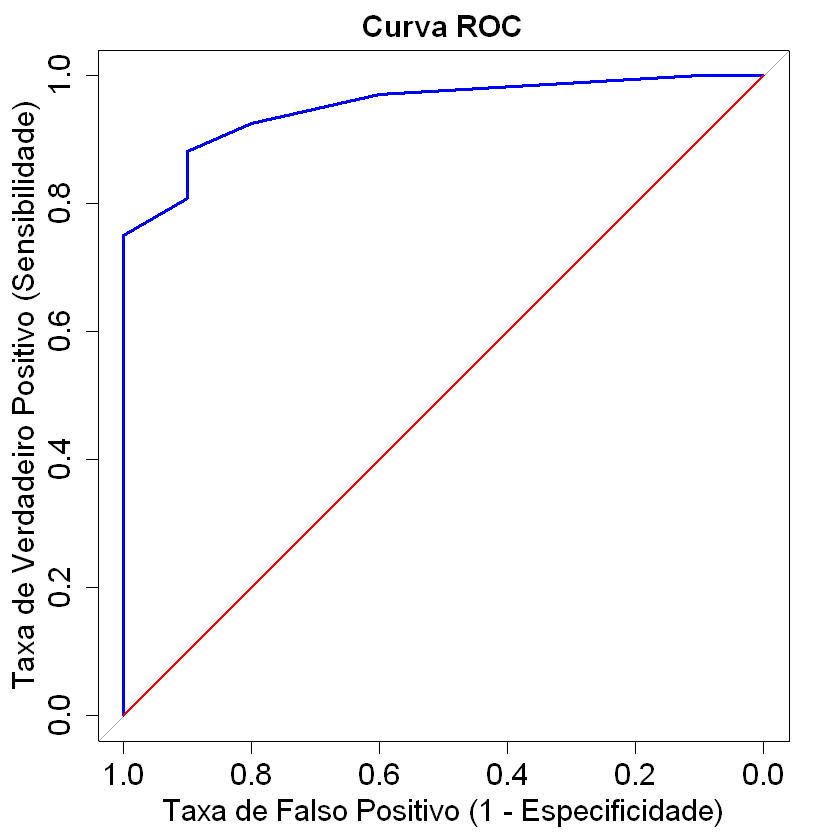

In [85]:
# Carregar a biblioteca pROC
library(pROC)

# Calcular a curva ROC
roc_result <- roc(prob_predictions$LUNG_CANCER, prob_predictions$.pred_YES)

# Plotar a curva ROC com modificações
plot(roc_result, main = 'Curva ROC', col = 'blue', lwd = 2.5, 
     xlab = 'Taxa de Falso Positivo (1 - Especificidade)', ylab = 'Taxa de Verdadeiro Positivo (Sensibilidade)', 
     cex.lab = 1.5, cex.axis = 1.5, cex.main = 1.5, cex.sub = 1.5)

# Adicionando a linha diagonal 
lines(x = c(1, 0), y = c(0, 1), col = 'red', lwd = 1.6)

### Ajuste de probabilidade, se necessário

In [86]:
# Fazendo previsões nos dados de teste
# prob_predictions <- predict(final_knn_model, new_data = df_test, type = 'prob')

# Definindo um novo limiar de decisão
# limiar <- 0.4

# Classificando com base no novo limiar
# class_predictions <- ifelse(prob_predictions$.pred_YES > limiar, 'YES', 'NO')

# Convertendo para fator
# class_predictions <- as.factor(class_predictions)

# Gerando um novo data frame que é uma cópia de df_test, com a coluna adicional predictions
# df_test_results <- df_test %>%
#   mutate(predictions = class_predictions)

# Calculando a matriz de confusão
# conf_matrix <- conf_mat(df_test_results, truth = LUNG_CANCER, estimate = predictions)

# Resumindo as métricas da matriz de confusão
# conf_matrix_summary <- conf_matrix %>% summary()
# conf_matrix_summary

# Visualizando a matriz de confusão
# autoplot(conf_matrix, type = 'heatmap') +
#   labs(title = 'Matriz de Confusão KNN',
#        x = 'Valores Preditos',
#        y = 'Valores Reais') +
#   scale_fill_gradient(low = 'white', high = 'blue', na.value = 'white') +
#   theme_minimal() +
#   theme(
#     plot.title = element_text(size = 18, face = 'bold'),
#     axis.title = element_text(size = 18),
#     axis.text = element_text(size = 18)
#   )


In [87]:
# Salvando o modelo final
saveRDS(final_knn_model, 'final_knn_model.rds')

## 4 - Conclusões modelo preditivo 
- Foram desenvolvidos cinco modelos de machine learning para a previsão de câncer de pulmão. O modelo de regressão logística, sem levar em conta o desbalanceamento das classes, atingiu um recall de 0.61 nos dados de treino. Em seguida, uma Random Forest, também sem tratar o desbalanceamento das classes, alcançou um recall de 0.58. Para melhorar o desempenho, aplicamos o método de case weights, que considera os pesos das classes, na Random Forest, resultando em um recall de 0.78.
- Para os modelos K-Nearest Neighbors (KNN), utilizamos técnicas de oversampling, já que o KNN não permite a inserção do método case weights, para lidar com o desbalanceamento das classes. O primeiro modelo KNN foi treinado com o método SMOTE (Synthetic Minority Over-sampling Technique), que cria exemplos sintéticos interpolando entre exemplos existentes da classe minoritária, e obteve um recall de 0.85. O segundo modelo KNN utilizou o método ADASYN (Adaptive Synthetic Sampling), que gera exemplos sintéticos adaptando-se à distribuição das instâncias minoritárias e criando mais exemplos para as instâncias minoritárias mais difíceis de classificar. Este modelo alcançou um recall de 0.90 nos dados de treino e teste.
- Esses resultados indicam que há espaço para melhorar ainda mais os modelos de machine learning, especialmente no que diz respeito ao recall. Um recall maior que 0.90 é preferível, pois aumenta a capacidade do modelo de identificar corretamente a maioria dos casos positivos de câncer de pulmão, minimizando o risco de falsos negativos e possibilitando intervenções precoces e mais eficazes.

## 5 - Deploy
- O segundo objetivo deste projeto era realizar o deploy do modelo para um serviço de nuvem utilizando a AWS, por meio das bibliotecas Vetiver e Plumber. A biblioteca Vetiver permite gerenciar e versionar modelos de machine learning de maneira eficiente, facilitando a integração e o deploy desses modelos em ambientes de produção. A Vetiver também gera um arquivo Docker, que em seguida é usado para criar uma imagem Docker.
- Já a Plumber permite a criação de APIs RESTful em R, facilitando a exposição dos modelos de machine learning como serviços web. Com a API criada, o arquivo Docker gerado pela Vetiver pode ser hospedado no serviço ECS (Elastic Container Service) da AWS, permitindo que o modelo seja acessível de maneira escalável e segura pela internet. Esse processo de deploy na nuvem garante que o modelo esteja disponível para uso contínuo, possibilitando a realização de previsões em tempo real e integrando-se perfeitamente com outras aplicações e serviços
Referências : https://juliasilge.com/blog/lego-sets/

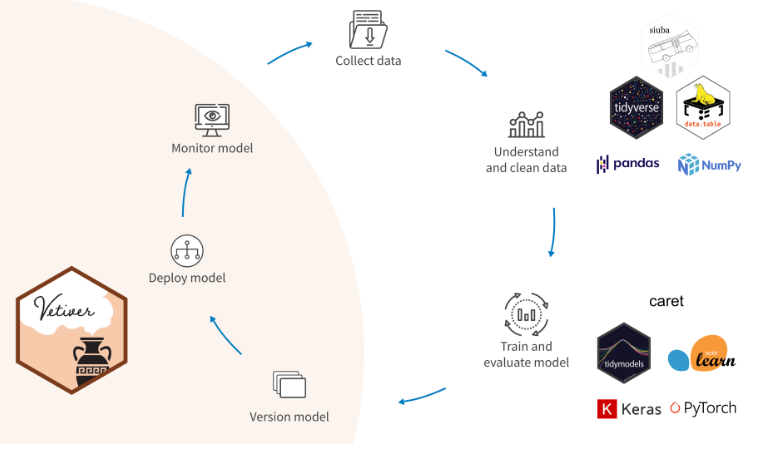

In [88]:
library('plumber')
library('pins')
library('vetiver')


Anexando pacote: 'vetiver'


O seguinte objeto é mascarado por 'package:tune':

    load_pkgs




- **pins:** O pacote pins permite publicar conjuntos de dados, modelos e outros recursos em um 'board', facilitando o compartilhamento com outros e o acesso em diferentes sessões. É uma biblioteca geral para compartilhar e versionar qualquer tipo de recurso (dados, modelos, etc.).
- **vetiver:** É uma biblioteca especializada em versionamento e implantação de modelos de machine learning, oferecendo integração com APIs para facilitar o uso desses modelos em produção.
- **plumber:** O pacote plumber permite transformar funções R em APIs RESTful. Isso é útil para expor modelos de machine learning como serviços web, que podem ser consumidos por outras aplicações ou usuários.

In [89]:
# Carregando o modelo salvo
final_knn_model <- readRDS('final_knn_model.rds')

In [90]:
# Criando um objeto vetiver a partir do modelo carregado
v <- vetiver_model(final_knn_model, model_name = 'final_knn_model')
v


── final_knn_model ─ <bundled_workflow> model for deployment 
A kknn classification modeling workflow using 15 features

In [91]:
# Criando um board para armazenar o modelo
model_board <- board_folder(path = "pins-r", versioned = TRUE)
model_board

Pin board <pins_board_folder>
Path: 'pins-r'
Cache size: 0

In [92]:
# Salvando o modelo Vetiver no board
vetiver_pin_write(model_board, v)

Creating new version '20240702T224204Z-88d75'
Writing to pin 'final_knn_model'

Create a Model Card for your published model
• Model Cards provide a framework for transparent, responsible reporting
• Use the vetiver `.Rmd` template as a place to start
This message is displayed once per session.


In [93]:
#Criando a API usando o Plumber e Vetiver:
vetiver_write_plumber(model_board, 'final_knn_model')

- **Um arquivo plumber.R será gerado pelo comando vetiver_write_plumber, este arquivo contém o código necessário para criar uma API Plumber. O Arquivo plumber será copiado para um contêiner Docker.**
- **O comando vetiver_write_docker() cria um arquivo Dockerfile que podemos usar para construir uma imagem Docker do seu modelo. Isso permite a implantação do modelo em um ambiente Dockerizado.**
- **Este comando também cria arquivo renv.lock que captura o estado do ambiente R (incluindo todas as dependências e suas versões) no momento em que o modelo foi salvo. Isso ajuda a garantir a reprodutibilidade ao implantar o modelo em diferentes ambientes.**
---
- Aparência do dockerfile:
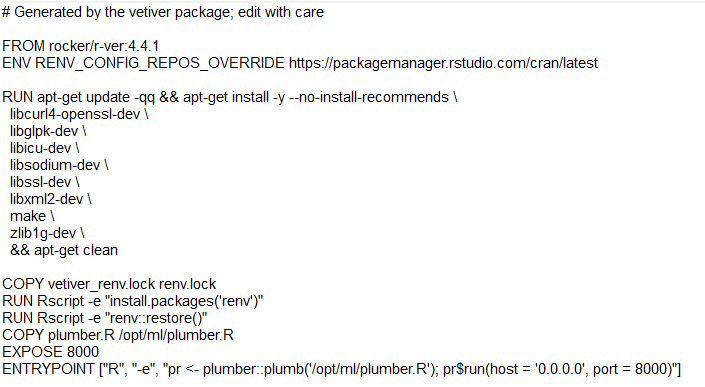

In [94]:
vetiver_write_docker(v)

- The lockfile is already up to date.


### Agora precisamor ir até o terminal do nosso sistema operacional:

- É necessário ter o Docker instalado: https://www.docker.com/
- Usuários de Windows: É necessário instalar o WSL. Utilize o comando abaixo para atualizar o WSL: wsl --update
- Passos para Construir e Executar a Imagem Docker
    - Navegar até o Diretório do Dockerfile: cd C:\caminho\para\seu\diretorio
    - Atualizar o Dockerfile
        - **Insira esta linha no seu Dockerfile: COPY pins-r /opt/ml/pins-r**
- Construir a Imagem Docker
    - Execute o comando para construir a imagem Docker: docker build -t nomeimagem .
- Executar o Contêiner Docker
    - Posteriormente, execute o comando para executar o contêiner: docker run --rm -p 8000:8000 nomeimagem
- Verificar a API Localmente
    - Você pode verificar a API localmente pelo endereço: http://127.0.0.1:8000/__docs__/

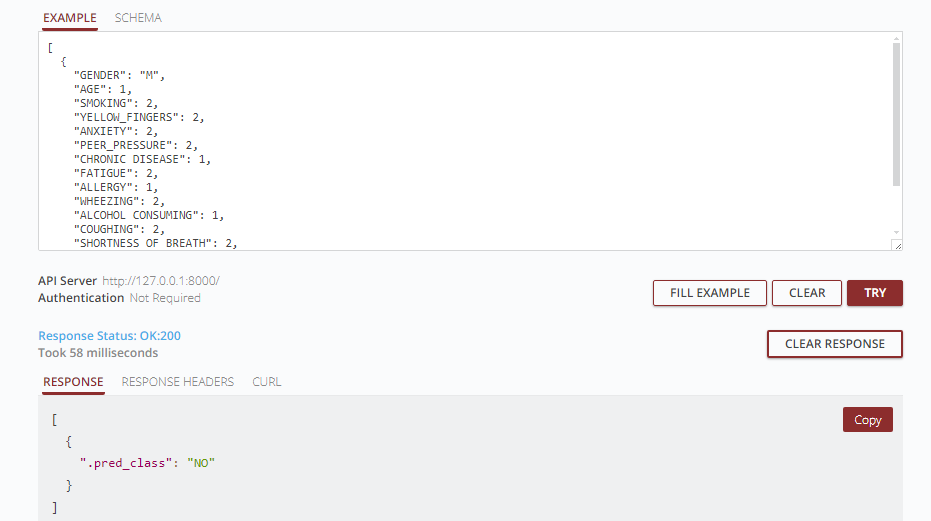

### Upload para Docker Hub
- Para facilitar o processo de deploy do modelo em qualquer serviço de cloud, vamos enviar a imagem recém criada para o Docker Hub.
- Faça login na sua conta do Docker Hub e clique em "Create Repository" para criar um novo repositório onde a imagem Docker será armazenada.
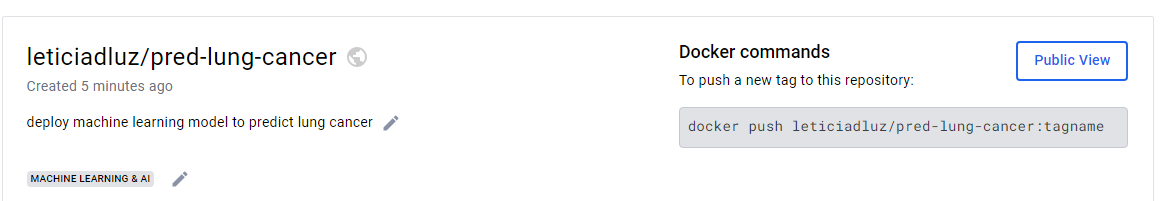
---
- Liste suas imagens:

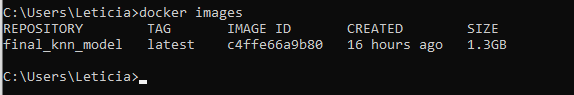

- Agora, tagueie a sua imagem Docker local com o nome do repositório do Docker Hub.
    - No meu caso, o comando é: docker tag final_knn_model:latest leticiadluz/pred-lung-cancer:latest
- Depois, envie a imagem para o Docker Hub usando o comando docker push: 
    - No meu caso, o comando é: docker push leticiadluz/pred-lung-cancer:latest
    
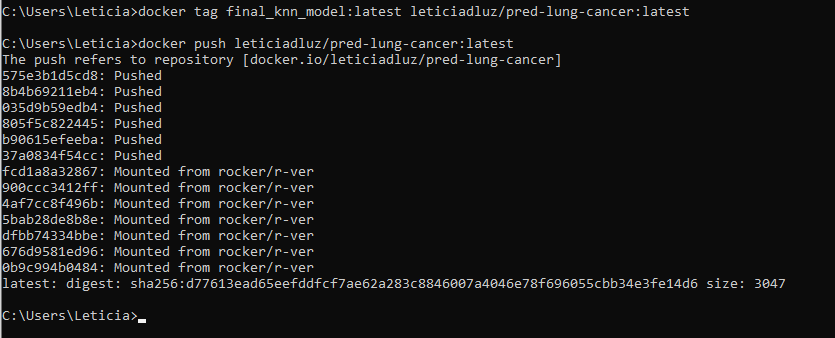

---
- Agora a imagem está no Docker Hub:
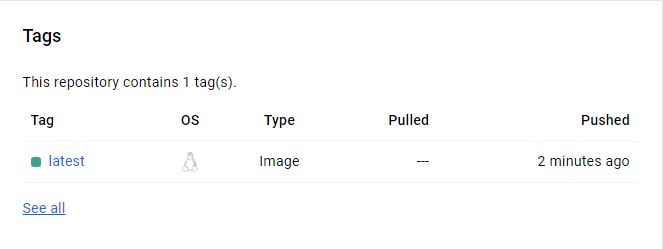

---
### Deploy para ECS da AWS:

- **Criar uma Conta na AWS:**
    - Antes de começar, é necessário criar uma conta na AWS. Acesse AWS Sign Up e siga as instruções para criar sua conta.
- **Instalar AWS CLI:**
    - https://docs.aws.amazon.com/cli/latest/userguide/getting-started-install.html
    - AWS CLI (Command Line Interface) permite realizar comandos no AWS diretamente do terminal.

- **Configurar IAM (Identity and Access Management):**
    - Acesse o console do IAM na AWS.
    - Clique em Usuários.
    - Selecione Adicionar usuário.
    - Defina um nome para o usuário
    - Clique em anexar políticas diretamente
    - Selecione AdministratorAccess
    - Clique em Criar usuário
    - Clique em Visualizar usuário
    - Gere uma chave de acesso (Access Key) e uma chave secreta (Secret Access Key).
    - Anote-as
- **Configurar AWS CLI:**
    - No terminal, execute o comando aws configure.
    - Insira a Access Key e a Secret Access Key geradas no passo anterior.
    - Configure a região e o formato de saída.

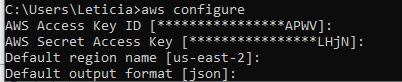

---

### Passo a Passo para Configurar o Elastic Container Service (ECS) na AWS
- Vá para a AWS Management Console.
- No menu de serviços, selecione Elastic Container Service (ECS).
- Clique em Task Definitions (Definições de Tarefa) no painel de navegação.
- Clique no botão Create new Task Definition (Criar nova Definição de Tarefa).
- Especifique um nome de família da definição de tarefa (Task Definition Family Name).
- Deixe os requisitos de infraestrutura como padrão.
- Dê um nome para seu contêiner.
- Insira a URL da imagem do Docker que você deseja usar.
- Deixe todas as demais configurações padrão.
- Revise suas configurações e clique em "Create" (Criar) para finalizar a criação da definição de tarefa.

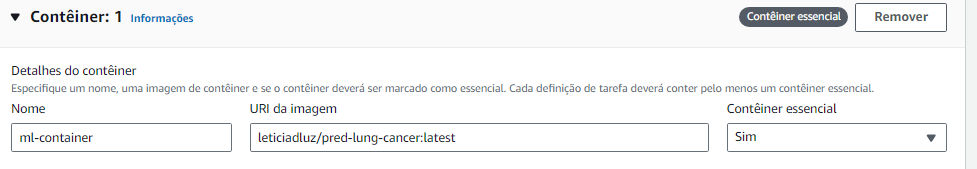

---
- Clique no botão "Create Cluster" (Criar Cluster).
- Insira um nome para o seu cluster. Este nome será usado para identificar seu cluster no ECS
- Deixe as definições padrão selecionadas.
- Revise suas configurações e clique em "Create" (Criar) para finalizar a criação do cluster.

---
- Após criar o cluster, abra o cluster clicando no nome do cluster na lista de clusters.
- No painel do cluster, clique em "Create Service" (Criar Serviço).
- Na seção "Launch type" (Tipo de Inicialização), deixe a opção padrão selecionada.
- Na seção "Task Definition" (Definição de Tarefa), selecione a família e a revisão da definição de tarefa que você criou anteriormente.
- Insira um nome para o seu serviço. Este nome será usado para identificar seu serviço no ECS.
- Deixe todas as demais configurações padrão.
- Revise suas configurações e clique em "Create Service" (Criar Serviço) para finalizar a criação do serviço.
--- 
- Posteriormente à criação de um contêiner no AWS Elastic Container Service (ECS), um IP público será disponibilizado. Esse IP público pode ser usado para acessar o serviço implantado.
- No caso desta API Vetiver, o IP público pode ser inserido no endereço da API para realizar os testes, onde é possível realizar requisições de teste e obter previsões do modelo KNN.
### Embora uma aplicação mais robusta e voltada ao usuário final possa ser desenvolvida utilizando, por exemplo, a biblioteca Shiny, o objetivo deste projeto foi descrever detalhadamente como seria a implementação de uma API utilizando Vetiver e Plumber. O processo incluiu a criação da imagem Docker e o deploy para o AWS.
- Para demonstrar a criação e funcionamento do contêiner no AWS ECS e da aplicação, fiz um vídeo detalhando o processo, pois o serviço não ficará ativo para evitar custos futuros.
- Link:https://drive.google.com/drive/folders/1CjE35TrdnHBjZnJEEKLZ7MxsMdNOz_wU?usp=sharing

## 6 - Conclusões
- Apesar das limitações associadas ao tamanho e desbalanceamento do conjunto de dados, bem como à falta de informação sobre a fonte dos dados, o desenvolvimento deste modelo de previsão oferece um potencial significativo para melhorar a detecção precoce e a gestão do câncer de pulmão. Ao integrar este tipo de ferramenta preditiva nos fluxos de trabalho clínicos, é possível não apenas melhorar a eficiência do diagnóstico, mas também possibilitar intervenções preventivas.
- Além disso, este projeto permitiu demonstrar de forma introdutória como funciona a parte de MLOps (Machine Learning Operations). MLOps é a prática de colaboração e comunicação entre cientistas de dados e profissionais de operações para gerenciar o ciclo de vida de modelos de machine learning